##  Electronic Structure Calculations Using Configuration Interaction (CI)

In the realm of quantum chemistry, accurately determining the electronic structure of molecules is fundamental for predicting chemical properties and behaviors. Among the various methods available, Configuration Interaction (CI) stands out as a powerful approach that goes beyond the limitations of mean-field theories like Hartree-Fock (HF). CI is a post-Hartree-Fock method that offers a more precise approximation of the true electronic wavefunction by considering the correlation between electrons explicitly. 

The CI method improves upon the HF approximation by expanding the electronic wavefunction as a linear combination of Slater determinants. These determinants represent different electron configurations, each contributing to the overall wavefunction. Unlike HF, which considers only a single Slater determinant (corresponding to a single configuration), CI includes excited configurations where electrons are promoted to higher energy orbitals. This allows CI to capture electron correlation effects, providing a more accurate description of the electronic structure.

Mathematically, the CI wavefunction is expressed as:

$
\Psi_{\text{CI}} = c_0 \Psi_{\text{HF}} + \sum_{i,a} c_{i}^{a} \Psi_{i}^{a} + \sum_{i,j,a,b} c_{ij}^{ab} \Psi_{ij}^{ab} + \dots
$

Here, $ \Psi_{\text{CI}} $ is the CI wavefunction, $\Psi_{\text{HF}} $ is the Hartree-Fock determinant, $\Psi_{i}^{a} $ represents single excitations, $\Psi_{ij}^{ab}$ represents double excitations, and so on. The coefficients $ c_0, c_{i}^{a}, c_{ij}^{ab} $, etc., are determined by solving the CI eigenvalue problem. 

The CI method is renowned for its ability to systematically improve the accuracy of electronic structure calculations. By including more configurations, CI can approach the exact solution of the Schrödinger equation. Full CI (FCI), which includes all possible configurations, represents the most accurate solution within a given basis set. However, due to its computational cost, FCI is limited to small systems.

CI's hierarchical nature allows for various truncations, such as CI Singles (CIS), CI Singles and Doubles (CISD), and higher-order excitations. These truncated CI methods strike a balance between accuracy and computational feasibility, making them invaluable for studying medium-sized molecules and providing benchmarks for other computational methods. 

As computational power continues to grow, the role of CI in electronic structure calculations is expected to evolve. Emerging techniques such as Quantum Monte Carlo (QMC) and Density Matrix Renormalization Group (DMRG) are already being integrated with CI to handle larger systems with greater accuracy. Moreover, the development of hybrid classical-quantum algorithms, like Variational Quantum Eigensolver (VQE) combined with CI techniques, promises to push the boundaries of what is achievable in quantum chemistry.

Furthermore, the integration of machine learning with CI methods is opening new avenues for accelerating the solution of the CI equations and reducing computational costs. These advancements will likely make CI-based approaches more accessible for complex chemical systems, offering unprecedented precision in electronic structure predictions. 

Configuration Interaction represents a cornerstone in electronic structure theory, providing unmatched accuracy in describing molecular systems by incorporating electron correlation effects. As we continue to explore and refine these methods, CI remains a vital tool for researchers, engineers, and quantum enthusiasts striving to understand and predict the behavior of molecules at the quantum level.

In [1]:
# Import necessary libraries from Qiskit
from qiskit import  transpile
from qiskit.primitives import Estimator
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp, Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city
from qiskit_algorithms import VQE
from scipy.optimize import minimize
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the Hamiltonian for the hydrogen molecule (H₂) using Pauli operators
pauli_list = [
    ('II', -1.052373245772859),
    ('ZI',  0.39793742484318045),
    ('IZ', -0.39793742484318045),
    ('ZZ', -0.01128010425623538),
    ('XX',  0.18093119978423156)
]

In [3]:
# Convert the Pauli list to a SparsePauliOp object
hamiltonian = SparsePauliOp.from_list(pauli_list)

In [4]:
# Setup the quantum simulator with AerSimulator
simulator = AerSimulator()

In [5]:
# Define a variational ansatz using an EfficientSU2 circuit
ansatz = EfficientSU2(num_qubits=2, entanglement='full', reps=3)

In [6]:
# Define the VQE algorithm with the chosen ansatz and simulator
estimator = Estimator()
vqe = VQE(estimator=estimator, ansatz=ansatz, optimizer=minimize)

In [7]:
# Execute the VQE algorithm to find the ground state energy
result = vqe.compute_minimum_eigenvalue(operator=hamiltonian)

In [8]:
# Display the results
print("The ground state energy is: ", result.eigenvalue.real)
print("Optimal parameters: ", result.optimal_parameters)

The ground state energy is:  -1.8572750301365155
Optimal parameters:  {ParameterVectorElement(θ[0]): -2.1432680216651945, ParameterVectorElement(θ[1]): 0.9568063359568966, ParameterVectorElement(θ[2]): -1.3106733092560214, ParameterVectorElement(θ[3]): 0.40757587495059194, ParameterVectorElement(θ[4]): -2.666387349579493, ParameterVectorElement(θ[5]): 0.6370253024571725, ParameterVectorElement(θ[6]): -3.109007883725876, ParameterVectorElement(θ[7]): 1.431104621160557, ParameterVectorElement(θ[8]): -2.330012849532133, ParameterVectorElement(θ[9]): -2.5447558490526228, ParameterVectorElement(θ[10]): -1.4508757755963926, ParameterVectorElement(θ[11]): -2.701644865283101, ParameterVectorElement(θ[12]): 2.3945849794226017, ParameterVectorElement(θ[13]): -0.24716315788977983, ParameterVectorElement(θ[14]): 1.2091983335688365, ParameterVectorElement(θ[15]): -2.4922110977084744}


In [9]:
# Create the optimal circuit by setting the parameters found by VQE
optimal_circuit = ansatz.assign_parameters(result.optimal_parameters)

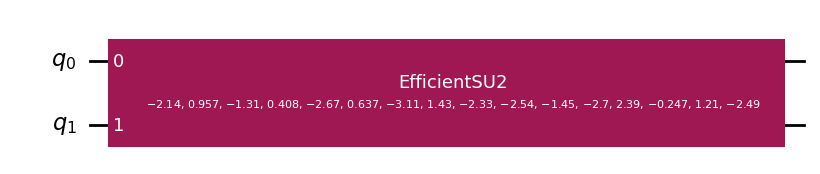

In [10]:
# Draw the optimal circuit in MPL format
optimal_circuit.draw('mpl').show()

In [11]:
# Transpile the circuit to make it compatible with the Aer simulator
transpiled_circuit = transpile(optimal_circuit, simulator)

In [12]:
# Save the statevector in the transpiled circuit
transpiled_circuit.save_statevector()

In [13]:
# Execute the transpiled circuit on the Aer simulator
result = simulator.run(transpiled_circuit).result()
state = result.get_statevector()

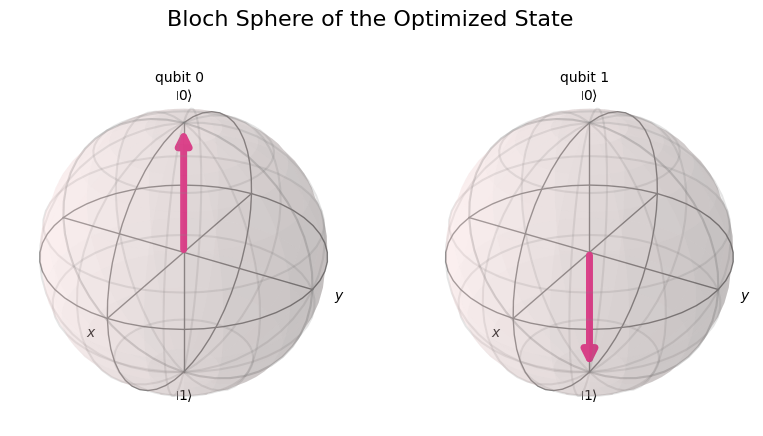

In [14]:
# Plot the Bloch vector for the first qubit
plot_bloch_multivector(state, title="Bloch Sphere of the Optimized State").show()

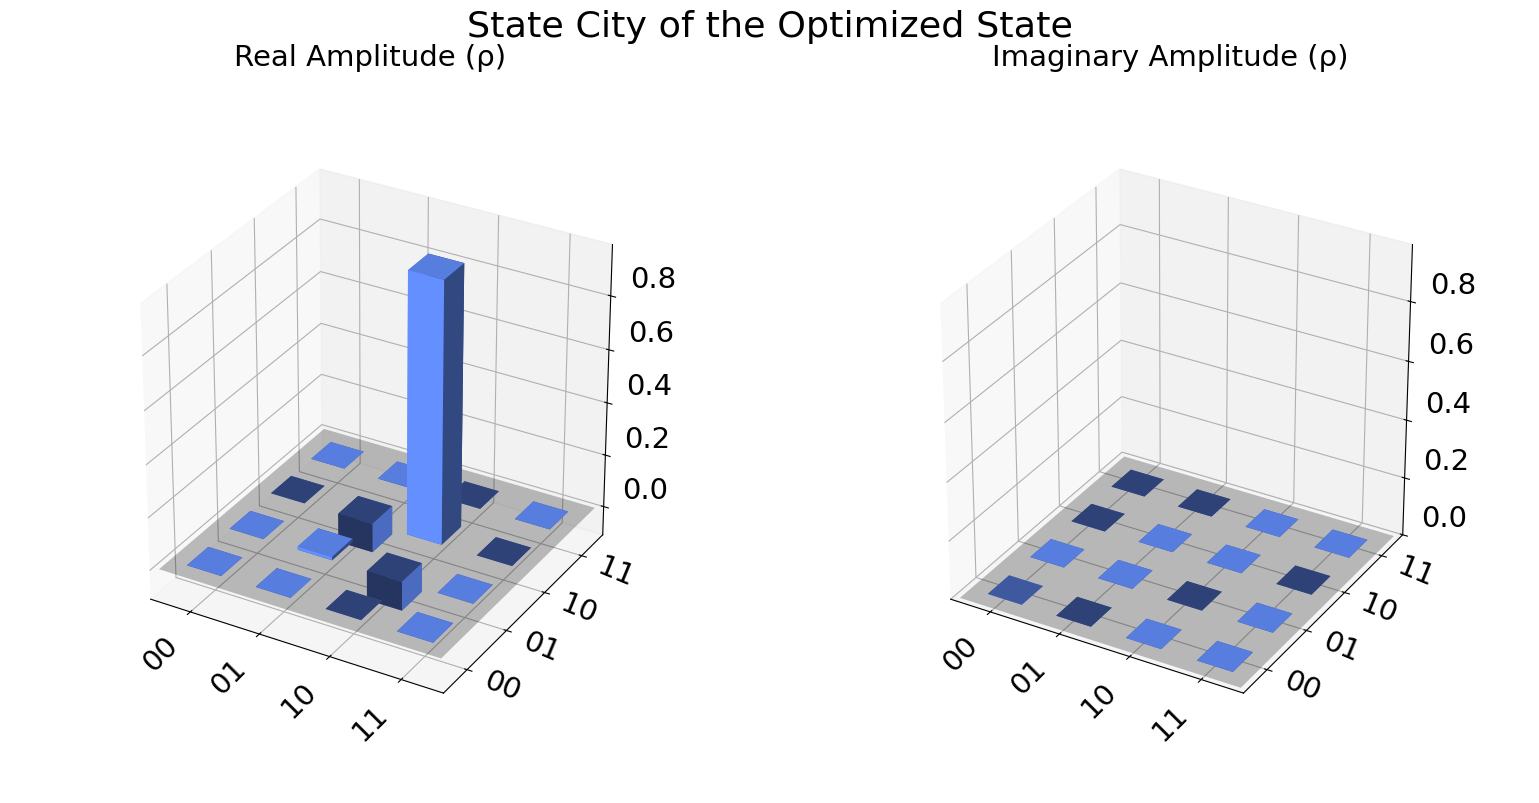

In [15]:
# Plot the state using state_city
plot_state_city(state, title="State City of the Optimized State").show()

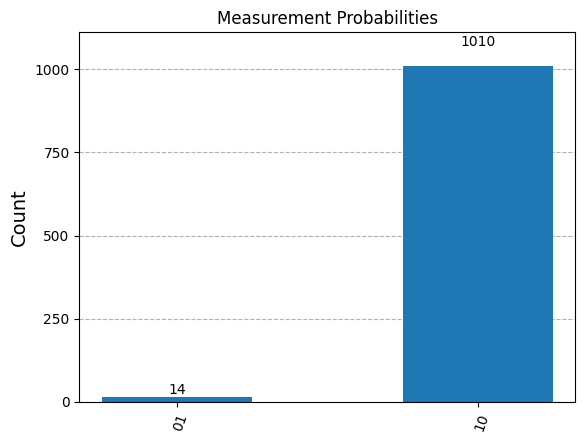

In [16]:
# Calculate and plot the measurement probabilities using a histogram
transpiled_circuit.measure_all()
counts = simulator.run(transpiled_circuit).result().get_counts()
plot_histogram(counts, title="Measurement Probabilities").show()

In [17]:
# Convert the statevector to a density matrix
density_matrix = state.to_operator().data

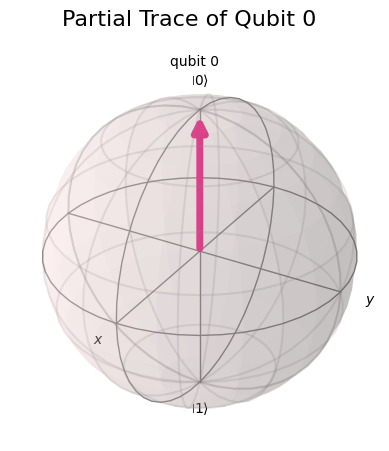

In [18]:
# Plot partial trace 
partial_trace_rho = partial_trace(density_matrix, [1])
plot_bloch_multivector(partial_trace_rho, title="Partial Trace of Qubit 0").show()